## Importing Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [119]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Importing dataset

In [87]:
df = pd.read_csv(r'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

## Analyzing dataset

In [88]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [89]:
df.shape

(205, 26)

In [90]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [91]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [92]:
df['CarName'].nunique()

147

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Spliting Dataset

In [94]:
x = df.drop(labels=['price','car_ID','CarName'],axis=1)
y = df['price']

In [95]:
x.drop(columns=['enginesize','drivewheel','doornumber','aspiration','carlength','enginelocation'],inplace=True,axis=1)

In [96]:
x.head()

,symboling,fueltype,carbody,wheelbase,carwidth,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,convertible,88.6,64.1,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,convertible,88.6,64.1,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,hatchback,94.5,65.5,52.4,2823,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,sedan,99.8,66.2,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,sedan,99.4,66.4,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,22


In [97]:
x.columns

Index(['symboling', 'fueltype', 'carbody', 'wheelbase', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')

In [98]:
le = LabelEncoder()

In [112]:
x['carbody'] = le.fit_transform(x['carbody'])
x['enginetype'] = le.fit_transform(x['enginetype'])
x['cylindernumber'] = le.fit_transform(x['cylindernumber'])
x['fuelsystem'] = le.fit_transform(x['fuelsystem'])
x['fueltype'] = le.fit_transform(x['fueltype'])

In [126]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=42)

In [127]:
lr = LinearRegression()
lr_model = lr.fit(xtrain,ytrain)
ypred = lr_model.predict(xtest)

In [128]:
mean_absolute_error(ytest,ypred)

2586.1162196608757

In [129]:
r2_score(ytest,ypred)

0.7491851839988333

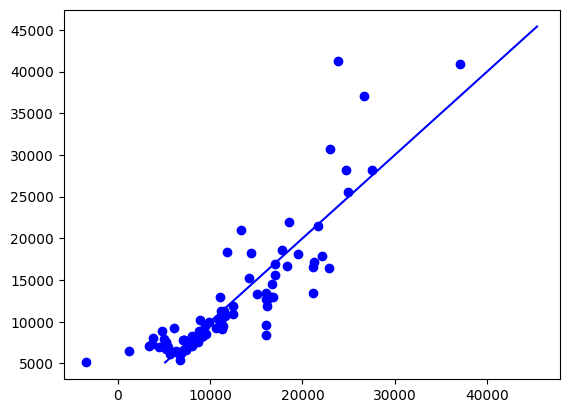

In [142]:
plt.scatter(ypred,ytest,color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()],color = 'blue')
plt.plot()
plt.show()

## Thank you